In [0]:
from __future__ import print_function

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive/My GG Colaboratory

/content/drive/My Drive/My GG Colaboratory


In [0]:
ls

'chữ viết tay.pynb'   traffic.ipynb         Untitled0.ipynb   Untitled2.ipynb
 data/                traffic-signs-data/   Untitled1.ipynb


In [0]:
import os
print(os.listdir("/content/drive/My Drive/My GG Colaboratory/traffic-signs-data/"))

['example_00001.png', 'example_00004.png', 'example_00002.png', 'example_00003.png', 'example_00006.png', 'example_00005.png', 'example_00009.png', 'example_00010.png', 'example_00007.png', 'example_00008.png', 'example_00011.png', 'example_00012.png', 'example_00015.png', 'example_00014.png', 'example_00013.png', 'example_00016.png', 'example_00019.png', 'example_00020.png', 'example_00017.png', 'example_00018.png', 'example_00021.png', 'example_00022.png', 'example_00023.png', 'example_00024.png', 'example_00025.png', 'example_00029.png', 'example_00027.png', 'example_00026.png', 'example_00030.png', 'example_00028.png', 'example_00031.png', 'example_00035.png', 'example_00032.png', 'example_00034.png', 'example_00033.png', 'example_00036.png', 'example_00037.png', 'example_00038.png', 'signnames.csv', 'test.p', 'train.p', 'valid.p', '.ipynb_checkpoints']


In [0]:
DATA_ROOT_PATH = 'traffic-signs-data/'
TRAIN_PATH = DATA_ROOT_PATH + 'train.p'
VALID_PATH = DATA_ROOT_PATH + 'valid.p'
TEST_PATH = DATA_ROOT_PATH + 'test.p'


In [0]:
import pickle

def load_traffic_sign_data(training_file, testing_file):
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
    return train, test

# Load pickled data
train, test = load_traffic_sign_data(TRAIN_PATH, TEST_PATH)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
import numpy as np

# Number of examples
n_train, n_test = X_train.shape[0], X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many classes?
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples  =", n_test)
print("Image data shape  =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples  = 12630
Image data shape  = (32, 32, 3)
Number of classes = 43


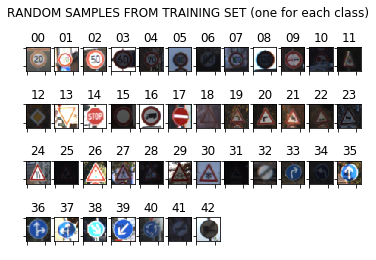

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# show a random sample from each class of the traffic sign dataset
rows, cols = 4, 12
fig, ax_array = plt.subplots(rows, cols)
plt.suptitle('RANDOM SAMPLES FROM TRAINING SET (one for each class)')
for class_idx, ax in enumerate(ax_array.ravel()):
    if class_idx < n_classes:
        # show a random image of the current class
        cur_X = X_train[y_train == class_idx]
        cur_img = cur_X[np.random.randint(len(cur_X))]
        ax.imshow(cur_img)
        ax.set_title('{:02d}'.format(class_idx))
    else:
        ax.axis('off')
# hide both x and y ticks
plt.setp([a.get_xticklabels() for a in ax_array.ravel()], visible=False)
plt.setp([a.get_yticklabels() for a in ax_array.ravel()], visible=False)
plt.draw()

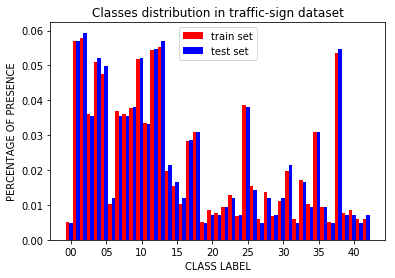

In [0]:
# bar-chart of classes distribution
train_distribution, test_distribution = np.zeros(n_classes), np.zeros(n_classes)
for c in range(n_classes):
    train_distribution[c] = np.sum(y_train == c) / n_train
    test_distribution[c] = np.sum(y_test == c) / n_test
fig, ax = plt.subplots()
col_width = 0.5
bar_train = ax.bar(np.arange(n_classes), train_distribution, width=col_width, color='r')
bar_test = ax.bar(np.arange(n_classes)+col_width, test_distribution, width=col_width, color='b')
ax.set_ylabel('PERCENTAGE OF PRESENCE')
ax.set_xlabel('CLASS LABEL')
ax.set_title('Classes distribution in traffic-sign dataset')
ax.set_xticks(np.arange(0, n_classes, 5)+col_width)
ax.set_xticklabels(['{:02d}'.format(c) for c in range(0, n_classes, 5)])
ax.legend((bar_train[0], bar_test[0]), ('train set', 'test set'))
plt.show()

In [0]:
import cv2 

def preprocess_features(X, equalize_hist=True):

    # convert from RGB to YUV
    X = np.array([np.expand_dims(cv2.cvtColor(rgb_img, cv2.COLOR_RGB2YUV)[:, :, 0], 2) for rgb_img in X])

    # adjust image contrast
    if equalize_hist:
        X = np.array([np.expand_dims(cv2.equalizeHist(np.uint8(img)), 2) for img in X])

    X = np.float32(X)

    # standardize features
    X -= np.mean(X, axis=0)
    X /= (np.std(X, axis=0) + np.finfo('float32').eps)

    return X

X_train_norm = preprocess_features(X_train)
X_test_norm = preprocess_features(X_test)

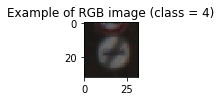

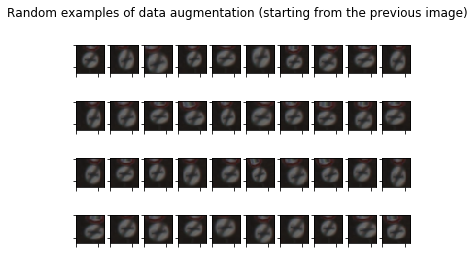

In [0]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

# split into train and validation
VAL_RATIO = 0.2
X_train_norm, X_val_norm, y_train, y_val = train_test_split(X_train_norm, y_train, test_size=VAL_RATIO, random_state=0)


# create the generator to perform online data augmentation
image_datagen = ImageDataGenerator(rotation_range=15.,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

# take a random image from the training set
img_rgb = X_train[0]

# plot the original image
plt.figure(figsize=(1,1))
plt.imshow(img_rgb)
plt.title('Example of RGB image (class = {})'.format(y_train[0]))
plt.show()

# plot some randomly augmented images
rows, cols = 4, 10
fig, ax_array = plt.subplots(rows, cols)
for ax in ax_array.ravel():
    augmented_img, _ = image_datagen.flow(np.expand_dims(img_rgb, 0), y_train[0:1]).next()
    ax.imshow(np.uint8(np.squeeze(augmented_img)))
plt.setp([a.get_xticklabels() for a in ax_array.ravel()], visible=False)
plt.setp([a.get_yticklabels() for a in ax_array.ravel()], visible=False)
plt.suptitle('Random examples of data augmentation (starting from the previous image)')
plt.show()

In [0]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def weight_variable(shape ,mu=0 ,sigma=0.1):
    initialization = tf.truncated_normal(shape=shape, mean=mu, stddev=sigma)
    return tf.Variable(initialization)

def bias_variable(shape, start_val=0.1):
    initialization = tf.constant(start_val, shape=shape)
    return tf.Variable(initialization)
  
def conv2d(x,W,strides=[1,1,1,1],padding='SAME'):
    return tf.nn.conv2d(input=x,filter=W,strides=strides,padding=padding)

def max_pool_2x2(x):
    return tf.nn.max_pool(value=x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

def net(x,n_classes):
    c1_out=64
    conv1_W=weight_variable(shape=(3,3,1,c1_out))
    conv1_b=bias_variable(shape=(c1_out,))
    conv1=tf.nn.relu(conv2d(x,conv1_W)+conv1_b)
    
    pool1=max_pool_2x2(conv1)
    drop1=tf.nn.dropout(pool1, keep_prob=keep_prob)
    
    c2_out=128
    
    
    conv2_W=weight_variable(shape=(3,3,c1_out,c2_out))
    conv2_b=bias_variable(shape=(c2_out,))
    conv2=tf.nn.relu(conv2d(drop1,conv2_W)+conv2_b)
    
    pool2=max_pool_2x2(conv2)
    drop2=tf.nn.dropout(pool2, keep_prob=keep_prob)
    
    fc0=flatten(drop2)
   
    fc1_out=64
    fc1_W=weight_variable(shape=(fc0._shape[1].value,fc1_out))
    fc1_b=bias_variable(shape=(fc1_out,))
    fc1=tf.matmul(fc0,fc1_W) +fc1_b
    drop_fc1=tf.nn.dropout(fc1, keep_prob=keep_prob)
    
    
    
    fc2_out=n_classes
    fc2_W=weight_variable(shape=(drop_fc1._shape[1].value,fc2_out))
    fc2_b=bias_variable(shape=(fc2_out,))
    logits=tf.matmul(drop_fc1,fc2_W) +fc2_b
    
    return logits
  
x= tf.placeholder(dtype=tf.float32,shape=(None,32,32,1))
y= tf.placeholder(dtype=tf.int32,shape=None)
keep_prob=tf.placeholder(tf.float32)

lr = 0.001
logits = net(x, n_classes=n_classes)
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss_function = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_step = optimizer.minimize(loss=loss_function)

    
  

In [0]:
BATCHSIZE =128
EPOCHS =15
BATCHES_PER_EPOCH=5000

In [0]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.cast(y, tf.int64))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    
    num_examples = X_data.shape[0]
    total_accuracy = 0
    
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCHSIZE):
        batch_x, batch_y = X_data[offset:offset+BATCHSIZE], y_data[offset:offset+BATCHSIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += accuracy * len(batch_x)
        
    return total_accuracy / num_examples
  
checkpointer = tf.train.Saver()

In [0]:
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for epoch in range(EPOCHS):

        print("EPOCH {} ...".format(epoch + 1))

        batch_counter = 0
        for batch_x, batch_y in image_datagen.flow(X_train_norm, y_train, batch_size=BATCHSIZE):

            batch_counter += 1
            sess.run(train_step, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

            if batch_counter == BATCHES_PER_EPOCH:
                break

       
        train_accuracy = evaluate(X_train_norm, y_train)
        val_accuracy = evaluate(X_val_norm, y_val)
        print('Train Accuracy = {:.3f} - Validation Accuracy: {:.3f}'.format(train_accuracy, val_accuracy))
        
      
        checkpointer.save(sess, save_path='../checkpoints/traffic_sign_model.ckpt', global_step=epoch)

EPOCH 1 ...
Train Accuracy = 0.873 - Validation Accuracy: 0.870
EPOCH 2 ...
Train Accuracy = 0.959 - Validation Accuracy: 0.958
EPOCH 3 ...
Train Accuracy = 0.978 - Validation Accuracy: 0.974
EPOCH 4 ...
Train Accuracy = 0.985 - Validation Accuracy: 0.980
EPOCH 5 ...
Train Accuracy = 0.990 - Validation Accuracy: 0.984
EPOCH 6 ...
Train Accuracy = 0.992 - Validation Accuracy: 0.985
Instructions for updating:
Use standard file APIs to delete files with this prefix.
EPOCH 7 ...
Train Accuracy = 0.993 - Validation Accuracy: 0.990
EPOCH 8 ...
Train Accuracy = 0.992 - Validation Accuracy: 0.989
EPOCH 9 ...
Train Accuracy = 0.996 - Validation Accuracy: 0.991
EPOCH 10 ...
Train Accuracy = 0.995 - Validation Accuracy: 0.991
EPOCH 11 ...
Train Accuracy = 0.996 - Validation Accuracy: 0.990
EPOCH 12 ...
Train Accuracy = 0.993 - Validation Accuracy: 0.989
EPOCH 13 ...
Train Accuracy = 0.995 - Validation Accuracy: 0.991
EPOCH 14 ...
Train Accuracy = 0.995 - Validation Accuracy: 0.992
EPOCH 15 ...
Tr

In [0]:
with tf.Session() as sess:

    
    checkpointer.restore(sess, '../checkpoints/traffic_sign_model.ckpt-14')
    
    test_accuracy = evaluate(X_test_norm, y_test)
    print('Performance on test set: {:.3f}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ../checkpoints/traffic_sign_model.ckpt-14
Performance on test set: 0.944


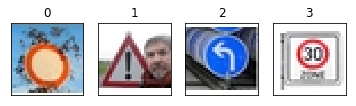

In [0]:
import os

# load new images
new_images_dir = '../other signs'
new_test_images = [os.path.join(new_images_dir, f) for f in os.listdir(new_images_dir)]
new_test_images = [cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB) for f in new_test_images]

# manually annotated labels for these new images
new_targets = [1, 13, 17, 35, 40]

# plot new test images
fig, axarray = plt.subplots(1, len(new_test_images))
for i, ax in enumerate(axarray.ravel()):
    ax.imshow(new_test_images[i])
    ax.set_title('{}'.format(i))
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_xticks([]), ax.set_yticks([])

In [0]:
# first things first: feature preprocessing
new_test_images_norm = preprocess_features(new_test_images)

with tf.Session() as sess:

    # restore saved session
    checkpointer.restore(sess, '../checkpoints/traffic_sign_model.ckpt-14')

    # predict on unseen images
    prediction = np.argmax(np.array(sess.run(logits, feed_dict={x: new_test_images_norm, keep_prob: 1.})), axis=1)

for i, pred in enumerate(prediction):
    print('Image {} - Target = {:02d}, Predicted = {:02d}'.format(i, new_targets[i], pred))
    
print('> Model accuracy: {:.02f}'.format(np.sum(new_targets==prediction)/len(new_targets)))

INFO:tensorflow:Restoring parameters from ../checkpoints/traffic_sign_model.ckpt-14
Image 0 - Target = 01, Predicted = 08
Image 1 - Target = 13, Predicted = 25
Image 2 - Target = 17, Predicted = 08
Image 3 - Target = 35, Predicted = 07
> Model accuracy: 0.00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


INFO:tensorflow:Restoring parameters from ../checkpoints/traffic_sign_model.ckpt-14
Top 3 model predictions for image 0 (Target is 01)
   Prediction = 08 with confidence 0.31
   Prediction = 02 with confidence 0.15
   Prediction = 03 with confidence 0.11
Top 3 model predictions for image 1 (Target is 13)
   Prediction = 25 with confidence 0.28
   Prediction = 28 with confidence 0.19
   Prediction = 30 with confidence 0.14
Top 3 model predictions for image 2 (Target is 17)
   Prediction = 08 with confidence 0.32
   Prediction = 40 with confidence 0.12
   Prediction = 03 with confidence 0.10
Top 3 model predictions for image 3 (Target is 35)
   Prediction = 07 with confidence 0.40
   Prediction = 02 with confidence 0.19
   Prediction = 05 with confidence 0.15


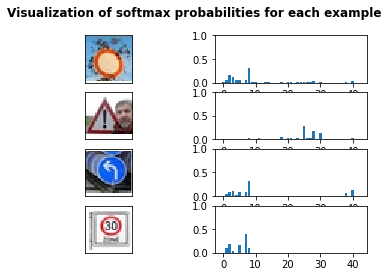

In [0]:
with tf.Session() as sess:

    # restore saved session
    checkpointer.restore(sess, '../checkpoints/traffic_sign_model.ckpt-14')

    # certainty of predictions
    K = 3
    top_3 = sess.run(tf.nn.top_k(logits, k=K), feed_dict={x: new_test_images_norm, keep_prob: 1.})

    # compute softmax probabilities
    softmax_probs = sess.run(tf.nn.softmax(logits), feed_dict={x: new_test_images_norm, keep_prob: 1.})

# plot softmax probs along with traffic sign examples
n_images = new_test_images_norm.shape[0]
fig, axarray = plt.subplots(n_images, 2)
plt.suptitle('Visualization of softmax probabilities for each example', fontweight='bold')
for r in range(0, n_images):
    axarray[r, 0].imshow(np.squeeze(new_test_images[r]))
    axarray[r, 0].set_xticks([]), axarray[r, 0].set_yticks([])
    plt.setp(axarray[r, 0].get_xticklabels(), visible=False)
    plt.setp(axarray[r, 0].get_yticklabels(), visible=False)
    axarray[r, 1].bar(np.arange(n_classes), softmax_probs[r])
    axarray[r, 1].set_ylim([0, 1])
    
# print top K predictions of the model for each example, along with confidence (softmax score)    
for i in range(len(new_test_images)):
    print('Top {} model predictions for image {} (Target is {:02d})'.format(K, i, new_targets[i]))
    for k in range(K):
        top_c = top_3[1][i][k]
        print('   Prediction = {:02d} with confidence {:.2f}'.format(top_c, softmax_probs[i][top_c]))